In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
wine_data = pd.read_csv("/content/winequality-red.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Checking for null values
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


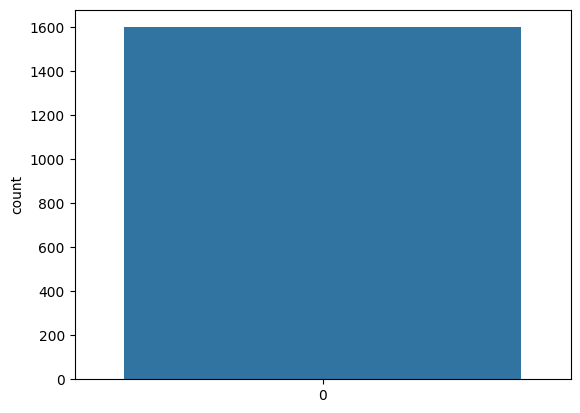

In [23]:
# Visualizing the distribution of the wine quality
sns.countplot(wine_data['quality'])
plt.show()

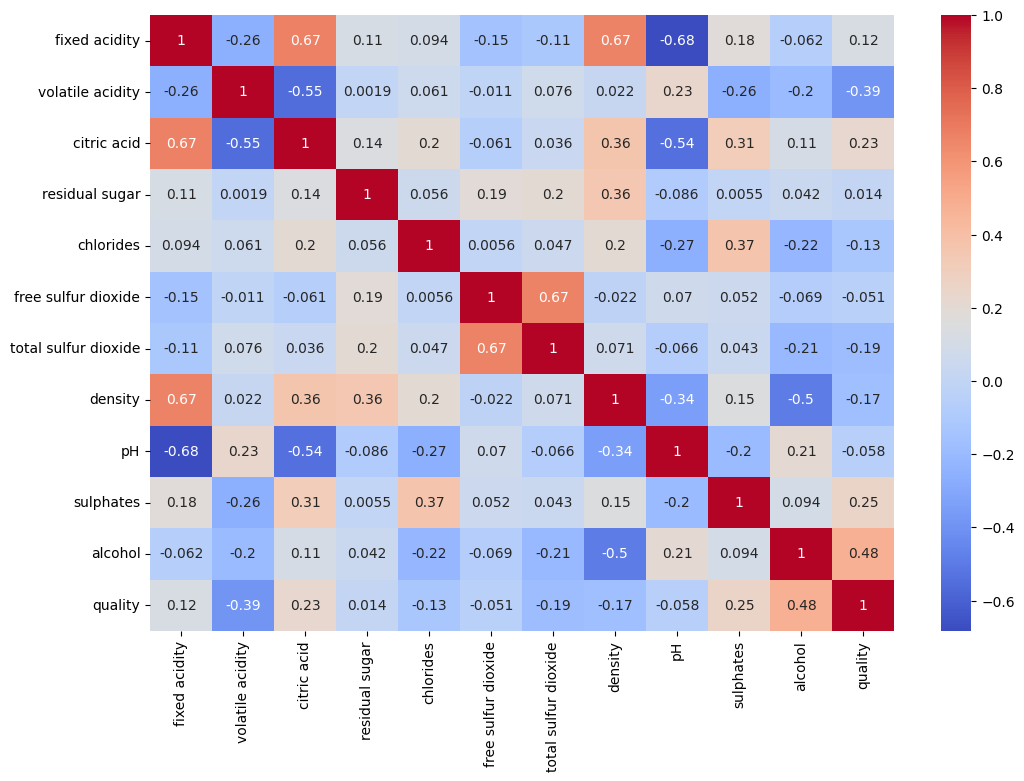

In [7]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:
# Feature and target split
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [21]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train:")
print(X_train.head())

Shape of X_train: (1279, 11)
Shape of X_test: (320, 11)
Shape of y_train: (1279,)
Shape of y_test: (320,)

First 5 rows of X_train:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493            8.7             0.690         0.31             3.0      0.086   
354            6.1             0.210         0.40             1.4      0.066   
342           10.9             0.390         0.47             1.8      0.118   
834            8.8             0.685         0.26             1.6      0.088   
705            8.4             1.035         0.15             6.0      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                 23.0                  81.0  1.00020  3.48       0.74   
354                 40.5                 165.0  0.99120  3.25       0.59   
342                  6.0                  14.0  0.99820  3.30       0.75   
834                 16.0                  23.0  0.99694  3.32       0.47   
705    

In [22]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("First 5 rows of standardized X_train:")
print(X_train[:5, :])

print("\nFirst 5 rows of standardized X_test:")
print(X_test[:5, :])


First 5 rows of standardized X_train:
[[ 0.21833164  0.88971201  0.19209222  0.30972563 -0.04964208  0.69100692
   1.04293362  1.84669643  1.09349989  0.45822284  1.12317723]
 [-1.29016623 -1.78878251  0.65275338 -0.80507963 -0.45521361  2.38847304
   3.59387025 -3.00449133 -0.40043872 -0.40119696  1.40827174]
 [ 1.49475291 -0.78434707  1.01104539 -0.52637831  0.59927236 -0.95796016
  -0.99174203  0.76865471 -0.07566946  0.51551749 -0.58738978]
 [ 0.27635078  0.86181102 -0.06383064 -0.66572897 -0.00908493  0.01202048
  -0.71842739  0.08948842  0.05423824 -1.08873281 -0.96751578]
 [ 0.04427419  2.81487994 -0.62686095  2.39998549 -0.31326357 -0.47296984
   0.2229897   1.1998714   0.37900751 -0.9741435  -0.49235828]]

First 5 rows of standardized X_test:
[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 -3.86510130e-02
   5.18158057e-01 -1.81975648e-01 -1.99566462e-02  1.75731759e-01
  -4.65392578e-01 -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 -6.65

In [12]:
# Machine Learning Model Building
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report

predictions = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 65.31%

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.76      0.73       130
           6       0.61      0.68      0.64       132
           7       0.65      0.48      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Test with Random Observation
import numpy as np
random_data = [7.4, 0.7, 0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]

random_data = scaler.transform(np.array(random_data).reshape(1, -1))
prediction = clf.predict(random_data)
print(f"The predicted quality for the given random observation is: {prediction[0]}")

The predicted quality for the given random observation is: 5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
